# A Pairs Trading strategy 

**Author:** Simão Moraes Sarmento <br /> 
**Contact:** simaosarmento@hotmail.com

## Dependencies

This notebook requires code from:

Python files:
- `class_SeriesAnalyser.py` - contains a set of functions to deal with time series analysis.
- `class_Trader.py` - contains a set of functions concerning trading strategies.
- `class_DataProcessor.py` - contains a set of functions concerning the data pre processing.

Pickle files:
- pickle file containing pairs to be traded (obtained from running `PairsTrading_CommodityETFs-Clustering.ipynb`)

As a good practise, the notebook solely intends to exemplify the application of different trading strategies for different dataset examples. Please look into the files menitoned above for more detailed info on how the functions are built.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

# just set the seed for the random number generator
np.random.seed(107)

In [2]:
ticker_path = "data/etfs/pickle/ticker_segment_dict.pickle"
with open(ticker_path, 'rb') as handle:
    ticker_segment_dict = pickle.load(handle)

### Import Classes

In [119]:
%load_ext autoreload
%aimport class_SeriesAnalyser, class_Trader, class_DataProcessor
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
series_analyser = class_SeriesAnalyser.SeriesAnalyser()
trader = class_Trader.Trader()
data_processor = class_DataProcessor.DataProcessor()

# Retrieve prices data set

We start by retrieving the data from a Dataframe saved in a pickle file, as it was previously processed in the `PairsTrading_CommodityETFS_Datapreprocessing.ipynb` notebook.

In [121]:
# intraday
df_prices = pd.read_pickle('data/etfs/pickle/commodity_ETFs_from_2014_complete.pickle')

In [122]:
# split data in training and test
df_prices_train, df_prices_test = data_processor.split_data(df_prices,
                                                            ('01-01-2014',
                                                             '31-12-2016'),
                                                            ('01-01-2017',
                                                             '31-12-2017'),
                                                            remove_nan=True)

Total of 116 tickers
Total of 116 tickers after removing tickers with Nan values


In [123]:
len(df_prices_train)+len(df_prices_test)

78258

# Load Pairs

In [124]:
# intra day
with open('data/etfs/pickle/2014-2018/pairs_no_clustering_intraday.pickle', 'rb') as handle:
    pairs = pickle.load(handle)

#with open('data/etfs/pickle/2014-2018/pairs_no_clustering_intraday_nohurst.pickle', 'rb') as handle:
#    pairs = pickle.load(handle)

#with open('data/etfs/pickle/2014-2018/pairs_no_clustering_intraday_only_coint.pickle', 'rb') as handle:
#    pairs = pickle.load(handle)

In [126]:
len(pairs)

150

# Apply trading strategies

**Applying the fixed beta strategy in validation period**

In [127]:
train_val_split = '2016-01-01'

# intraday
n_years_val = round(len(df_prices_train[train_val_split:])/(240*78))

# interday
#n_years_val = round(len(df_prices_train)/(240))

n_years_val

1

In [128]:
train_results_without_costs, train_results_with_costs, performance_threshold_train = \
        trader.apply_trading_strategy(pairs, 
                                       'fixed_beta',
                                        2,
                                        0,
                                        test_mode=False,
                                        train_val_split=train_val_split
                                       )

sharpe_results_threshold_train_nocosts, cum_returns_threshold_train_nocosts = train_results_without_costs
sharpe_results_threshold_train_w_costs, cum_returns_threshold_train_w_costs = train_results_with_costs

 entry delay turned on.
Pair: 150/150

Average SR:  1.5176550540210014
Annual ROI:  19.936289387667916
94.0 % of the pairs had positive returns
Sharpe Ratio using annual return 6.222829377464821
Autocorrelation:  0.03546883706652382
Daily Sharpe Ratio 0.3566097019364513
Portfolio Sharpe Ratio:  0.3566097019364513
Total number of trades:  384
Positive trades:  324
Negative trades:  60
Max DD period: 4.0 days
Maximum drawdown of portfolio: -1.24%


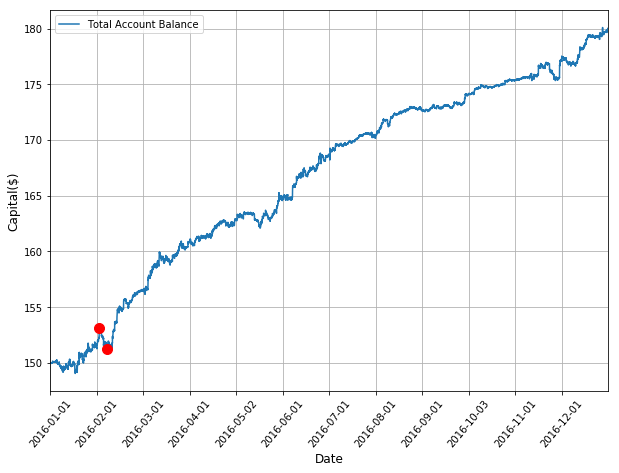

In [129]:
results, pairs_summary = trader.summarize_results(sharpe_results_threshold_train_w_costs,
                                                  cum_returns_threshold_train_w_costs,
                                                  performance_threshold_train,
                                                  pairs, ticker_segment_dict,
                                                  n_years_val)

In [149]:
print('Corrected Annualized SR: {:.2f}'.format(0.3566097019364513*(252**0.5)))

Corrected Annualized SR: 5.66


Sharpe Ratio Distribution: 


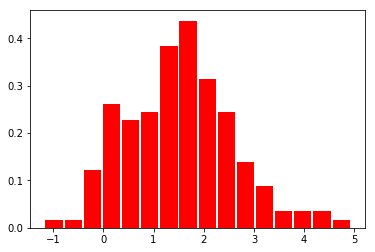

In [130]:
print('Sharpe Ratio Distribution: ')
n, bins, patches = plt.hist(sharpe_results_threshold_train_w_costs, bins = 16, normed=True, orientation='vertical',
                            color='red', rwidth=0.9, align='mid')

In [131]:
#cum_returns_threshold_train_w_costs

In [132]:
betas = list()
for i in range(len(pairs)):
    betas.append(pairs[i][2]['coint_coef'])
np.asarray(betas)

array([2.50126689e+00, 2.72766817e+00, 4.97837807e-01, 1.34817221e+00,
       2.51102383e+00, 4.86604551e-01, 5.37601888e+00, 2.15698159e+00,
       3.48872773e-01, 8.30727909e-01, 8.04207011e-01, 1.42040979e+00,
       5.29949447e-01, 5.44739817e-01, 7.04082863e-01, 4.74850398e-01,
       6.40183768e-01, 6.60507818e-01, 3.23395028e-01, 6.04787344e-01,
       2.86102543e+00, 2.00969757e-01, 6.02978576e+00, 1.28741471e+00,
       9.74452830e+01, 1.15178018e+00, 7.81691169e-01, 2.70723816e-01,
       1.37703517e+00, 4.50446200e+01, 1.47585815e+00, 5.31488338e-01,
       7.16683959e-01, 2.95224975e-01, 1.60930243e+00, 4.87426446e-01,
       4.07196316e-01, 7.29681197e-01, 4.37229795e-01, 7.66901016e-01,
       3.51772678e+00, 5.51370378e+00, 4.02662801e-01, 2.99238613e+00,
       1.10657726e+00, 7.95572416e-01, 6.56583927e+00, 4.86154176e-01,
       1.03387851e+00, 4.95904256e-01, 9.60603814e-01, 2.35749974e-01,
       2.81081808e+00, 7.22556258e+01, 5.41294141e-01, 1.78116398e+00,
      

# Out of Sample Analysis

In this section, we analyze the performance of the strategy in the validation dataset. 

We proceed with some data exploration analysis. For this purpose we will do the following:

- Analyze which percentage of the identified pairs are still cointegrated in the validation period.
- Analyze which percentage of pairs have positive returns, and how many of those are still cointegrated.
- Analyze how many new pais were not identified to be cointegrated up to the validation period.
- Run strategy for identified pairs in training period.

This analysis will help us getting some insight into how the cointegrated pairs vary from time to time, and therefore how we should allocate our resources to predict when pairs are not cointegrated anymore.

## Applying the Strategy out-of Sample

We might want to apply the strategy in all pairs identified. Or, instead, we might prefer to apply the strategy only on those pairs that turned out to be profitable. Let's compare how both approaches work:

In [133]:
# intraday
n_years_test = round(len(df_prices_test)/(240*78))

# interday
#n_years_test = round(len(df_prices_test)/(240))

n_years_test

1

### Approach 1: Unrestricted

**Basic Threshold Strategy**

In [134]:
results_without_costs, results_with_costs, performance_threshold_test = \
                            trader.apply_trading_strategy(pairs, 
                                                           'fixed_beta',
                                                            2,#entry_multiplier,
                                                            0,#exit_multiplier,
                                                            test_mode=True,
                                                            train_val_split=train_val_split
                                                           )
sharpe_results_threshold_test_nocosts, cum_returns_threshold_test_nocosts = results_without_costs
sharpe_results_threshold_test_w_costs, cum_returns_threshold_test_w_costs = results_with_costs

 entry delay turned on.
Pair: 150/150

Average SR:  0.9060715285252559
Annual ROI:  11.867690814522636
69.33333333333333 % of the pairs had positive returns
Sharpe Ratio using annual return 4.326198125730516
Autocorrelation:  0.036101266448998144
Daily Sharpe Ratio 0.25723643000715213
Portfolio Sharpe Ratio:  0.25723643000715213
Total number of trades:  212
Positive trades:  172
Negative trades:  40
Max DD period: 15.0 days
Maximum drawdown of portfolio: -1.33%


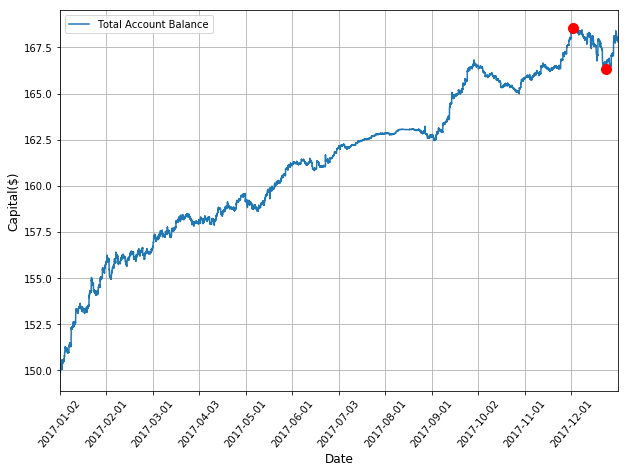

In [135]:
results, pairs_summary = trader.summarize_results(sharpe_results_threshold_test_w_costs,
                                                  cum_returns_threshold_test_w_costs,
                                                  performance_threshold_test,
                                                  pairs, ticker_segment_dict,
                                                  n_years_test)

In [146]:
print('Corrected Annualized SR: {:.2f}'.format(0.25723643000715213*(252**0.5)))

Corrected Annualized SR: 4.08


### Approach 2: Keeping only pairs that had positive returns in the training period

In [136]:
cum_returns_threshold_train_w_costs = np.asarray(cum_returns_threshold_train_w_costs)
profitable_pairs_indices = np.argwhere(cum_returns_threshold_train_w_costs > 0)
profitable_pairs = [pairs[i] for i in profitable_pairs_indices.flatten()]

In [137]:
results_without_costs, results_with_costs, performance_threshold_test = \
                            trader.apply_trading_strategy(profitable_pairs, 
                                                           'fixed_beta',
                                                            2,#entry_multiplier,
                                                            0,#exit_multiplier,
                                                            test_mode=True,
                                                            train_val_split=train_val_split
                                                           )
sharpe_results_threshold_test_nocosts, cum_returns_threshold_test_nocosts = results_without_costs
sharpe_results_threshold_test_w_costs, cum_returns_threshold_test_w_costs = results_with_costs

 entry delay turned on.
Pair: 141/141

Average SR:  0.9572455910347445
Annual ROI:  12.385930226908503
69.50354609929079 % of the pairs had positive returns
Sharpe Ratio using annual return 4.302905145145404
Autocorrelation:  0.02447632011167949
Daily Sharpe Ratio 0.2552939302852117
Portfolio Sharpe Ratio:  0.2552939302852117
Total number of trades:  195
Positive trades:  162
Negative trades:  33
Max DD period: 14.0 days
Maximum drawdown of portfolio: -1.38%


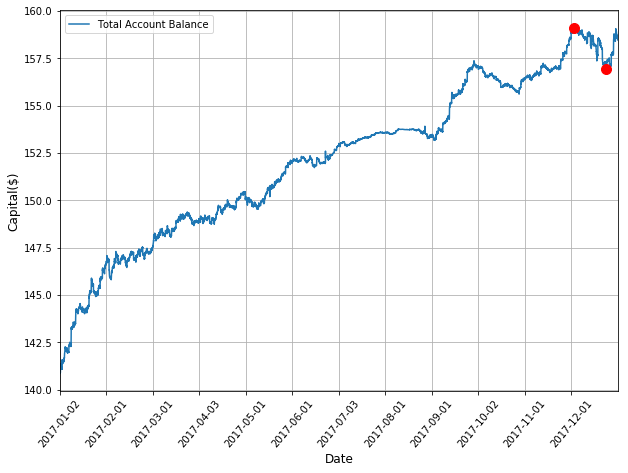

In [138]:
results, pairs_summary = trader.summarize_results(sharpe_results_threshold_test_w_costs,
                                                  cum_returns_threshold_test_w_costs,
                                                  performance_threshold_test,
                                                  profitable_pairs, ticker_segment_dict,
                                                  n_years_test)

In [147]:
print('Corrected Annualized SR: {:.2f}'.format(0.2552939302852117*(252**0.5)))

Corrected Annualized SR: 4.05


### Approach 3: Keeping only top 5 pairs

In [139]:
sharpe_results_threshold_train_w_costs = np.asarray(sharpe_results_threshold_train_w_costs)
sorted_pairs_indices = np.argsort(sharpe_results_threshold_train_w_costs)[::-1][:10]
top_10_pairs = [pairs[i] for i in sorted_pairs_indices.flatten()]

In [140]:
# sorting by returns seems to give better results

In [141]:
cum_returns_threshold_train_w_costs = np.asarray(cum_returns_threshold_train_w_costs)
sorted_pairs_indices = np.argsort(cum_returns_threshold_train_w_costs)[::-1][:10]
top_10_pairs = [pairs[i] for i in sorted_pairs_indices.flatten()]

In [142]:
results_without_costs, results_with_costs, performance_threshold_test = \
                            trader.apply_trading_strategy(top_10_pairs, 
                                                           'fixed_beta',
                                                            2,#entry_multiplier,
                                                            0,#exit_multiplier,
                                                            test_mode=True,
                                                            train_val_split=train_val_split
                                                           )
sharpe_results_threshold_test_nocosts, cum_returns_threshold_test_nocosts = results_without_costs
sharpe_results_threshold_test_w_costs, cum_returns_threshold_test_w_costs = results_with_costs

 entry delay turned on.
Pair: 10/10

Average SR:  0.7798822367036616
Annual ROI:  11.512673650076422
90.0 % of the pairs had positive returns
Sharpe Ratio using annual return 1.1423450533979258
Autocorrelation:  0.04051460591106734
Daily Sharpe Ratio 0.07012715100073962
Portfolio Sharpe Ratio:  0.07012715100073962
Total number of trades:  14
Positive trades:  12
Negative trades:  2
Max DD period: 16.0 days
Maximum drawdown of portfolio: -9.28%


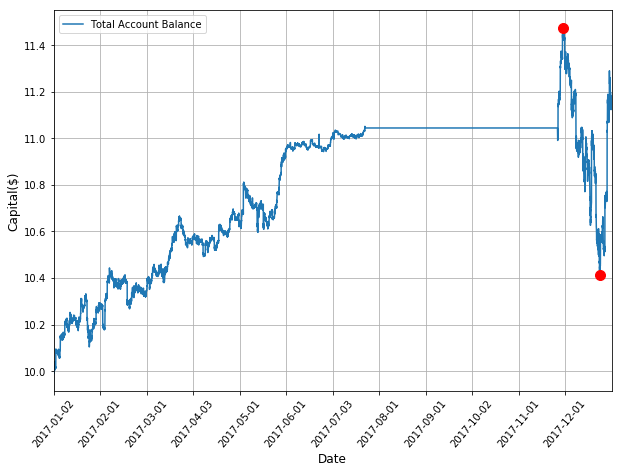

In [143]:
results, pairs_summary = trader.summarize_results(sharpe_results_threshold_test_w_costs,
                                                  cum_returns_threshold_test_w_costs,
                                                  performance_threshold_test,
                                                  top_10_pairs, ticker_segment_dict,
                                                  n_years_test)

In [148]:
print('Corrected Annualized SR: {:.2f}'.format(0.07012715100073962*(252**0.5)))

Corrected Annualized SR: 1.11


In [144]:
pairs_summary

,Leg1,Leg1_Segmt,Leg2,Leg2_Segmt,t_statistic,p_value,zero_cross,half_life,hurst_exponent,positive_trades,negative_trades,sharpe_result,positive_trades_per_pair_pct
0,ENFR,Equity: U.S. MLPs,YMLI,Equity: U.S. MLPs,-4.045626,0.001190,609,124,0.218409,3,0,2.058766,100.0
1,IEO,Equity: U.S. Oil & Gas Exploration & Production,PALL,Commodities: Precious Metals Palladium,-3.443480,0.009563,350,1437,0.485947,1,0,1.840913,100.0
2,VDE,Equity: U.S. Energy,PALL,Commodities: Precious Metals Palladium,-3.560780,0.006557,412,1349,0.481469,1,0,1.800691,100.0
3,UCI,Commodities: Broad Market,UNL,Commodities: Energy Natural Gas,-4.180098,0.000712,419,205,0.307583,1,1,1.219295,50.0
4,AMLP,Equity: U.S. MLPs,ENFR,Equity: U.S. MLPs,-3.631002,0.005195,801,219,0.284800,1,0,0.846866,100.0
5,PSCE,Equity: U.S. Energy,UNL,Commodities: Energy Natural Gas,-3.503207,0.007905,236,1149,0.455811,2,0,0.680468,100.0
6,DTO,Inverse Commodities: Energy Crude Oil,KOLD,Inverse Commodities: Energy Natural Gas,-4.063344,0.001113,183,1233,0.478179,1,0,0.021187,100.0
7,SCO,Inverse Commodities: Energy Crude Oil,KOLD,Inverse Commodities: Energy Natural Gas,-3.820588,0.002704,347,1527,0.488263,1,0,0.004656,100.0
8,UGA,Commodities: Energy Gasoline,UNG,Commodities: Energy Natural Gas,-3.826968,0.002643,382,1259,0.489978,1,0,-0.067257,100.0
9,DBE,Commodities: Energy,UNL,Commodities: Energy Natural Gas,-3.780758,0.003110,335,925,0.445612,0,1,-0.606763,0.0


In [33]:
# different ways of calculating returns

In [34]:
i = 4
print('Return by position returns: ',
      (np.cumprod(performance_threshold_test[i][1].position_return.values+1)-1)[-1])
print('Return by position returns: ',
      (np.cumprod(performance_threshold_test[i][1].position_ret_with_costs.values+1)-1)[-1])
print('Return by account balance: ',performance_threshold_test[i][1].account_balance[-1]-1)

Return by position returns:  0.12190208117405721
Return by position returns:  0.11352679355351403
Return by account balance:  0.11352679355350825
